# Code for burning tree from source node

In [12]:
def burn_tree_recursive(tree, burning, burnt, rounds, memo):
    
    # tree : The adjacency list representation of the tree.
    # burning : The set of nodes that are currently burning.
    # burnt : The set of nodes that have already burnt down.
    # rounds : The number of rounds that have passed.
    # memo : A dictionary used for memoization to store already computed results.
    
    # Have we already parsed through this?
    burnt_tuple = tuple(burnt)
    if burnt_tuple in memo:
        return memo[burnt_tuple]
    
    # Did we burn the whole tree?
    if len(burnt) == len(tree):
        return rounds

    # New burning nodes of this round
    new_burning = []
    for node in burning:
        for neighbor in tree[node]:
            if neighbor not in burnt:
                new_burning.append(neighbor)
    
    # Update the lists
    burning.extend(new_burning)
    burnt.extend(new_burning)
    rounds += 1

    # Have we burnt the whole tree?
    if len(burnt) == len(tree):
        memo[burnt_tuple] = rounds
        return rounds

    min_rounds = float('inf')
    # Check for minimum when starting with this source node
    for new_node in tree:
        if new_node not in burnt:

            burning.append(new_node)
            burnt.append(new_node)

            # burn the remaining nodes
            result = burn_tree_recursive(tree, burning.copy(), burnt.copy(), rounds, memo)
            min_rounds = min(min_rounds, result)

            # update
            burning.remove(new_node)
            burnt.remove(new_node)

    memo[burnt_tuple] = min_rounds
    # print(memo)
    return min_rounds

# memo : memorize the rounds needed to burn a sequence of nodes


## Code for finding the burning number by brute force

In [13]:
def burning_number(tree):

    min_burning_number = float('inf')
    memo = {}
    nodes = list(tree.keys())

    if len(tree) == 0:
        return 0

    # Iterate through the nodes
    for node in nodes:

        burning = [node]
        burnt = [node]

        # get the minimum rounds for that node
        result = burn_tree_recursive(tree, burning, burnt, 1, memo)

        # update the burning number
        min_burning_number = min(min_burning_number, result)

    return min_burning_number

In [14]:
# Example tree representation as an adjacency list
tree = {
    0: [1, 2],
    1: [0, 3, 4],
    2: [0],
    3: [1],
    4: [1]
}

result = burning_number(tree)
print(f"Minimum rounds to burn the tree: {result}")


Minimum rounds to burn the tree: 2


In [15]:
# Example
tree = {
    0: [1, 2],
    1: [0, 3, 4],
    2: [0, 5],
    3: [1],
    4: [1],
    5: [2]
}

result = burning_number(tree)
print(f"Minimum rounds to burn the tree: {result}")


Minimum rounds to burn the tree: 3


In [16]:
from collections import defaultdict, deque
from math import ceil, sqrt

def create_tree(nodes, edges):
    tree = defaultdict(list)
    for u, v in edges:
        tree[u].append(v)
        tree[v].append(u)
    return tree

In [17]:
nodes = list(range(6))
edges = [(0, 1), (0, 2), (1, 3), (1, 4), (4, 5)]

tree = create_tree(nodes, edges)

result = burning_number(tree)
print(f"Minimum rounds to burn the tree: {result}")

Minimum rounds to burn the tree: 3


In [18]:
nodes = list(range(5))
edges = [(0, 1), (0, 2), (1, 3), (1, 4)]
tree = create_tree(nodes, edges)

# print("Burning number of the tree:", burning_number(tree))

result = burning_number(tree)
print(f"Minimum rounds to burn the tree: {result}")


Minimum rounds to burn the tree: 2


In [25]:
nodes = list(range(5))
edges = [(i, i+1) for i in range(4)]
tree = create_tree(nodes, edges)

# Test the burning_number function with this tree
# Initialize parameters
result = burning_number(tree)
print(f"Minimum rounds to burn the tree: {result}")

Minimum rounds to burn the tree: 3


## Tim's code for GW tree generating

In [20]:

import random



#first initialise the offspring distribution (zeta): p_0, p_1, ... p_k
def zeta_unspecified(randweight=10, tolerance=10**(-6)):
    T = 1
    p = []
    while T > 0:
        newp = random.random()/randweight
        if T >= newp:
            T = T - newp
            p.append(newp)
        else:
            p.append(T)
            T = 0
    assert(-tolerance <= sum(p) - 1 <= tolerance)
    return p


# a zeta where the expected number of children is 1, this is called a critical GW process
zeta_critical_example1 = [0.4, 0.3, 0.2, 0.1]
zeta_critical_example2 = [0.3, 0.4, 0.3]

##########################################################################################

#next we use the previous code to make a zeta and generate a GW tree of specified size n
def generate_GW(zeta, n):
    kidlist = [i for i in range(len(zeta))]
    edges = set()
    parent=0
    upper=1
    while upper <= n-1:
        [nchild] = random.choices(kidlist,weights=zeta, k=1)
        #print(nchild)
        for _ in range(nchild):
            edges.add((parent, upper))
            upper += 1
            #print(edges)
            if upper >= n:
                return (n, edges)
        if parent+1 >= upper:
            return (n, edges)
        parent += 1



Tree with 10 nodes:
Edges: {(0, 1), (0, 3), (1, 4), (7, 9), (6, 7), (0, 2), (7, 8), (3, 6), (3, 5)}


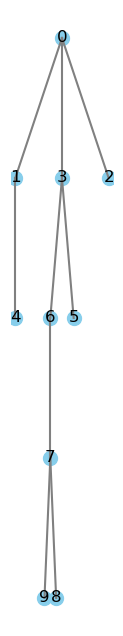

In [29]:
import matplotlib.pyplot as plt

# Define the functions from the last cell
def plot_tree(edges):
    def get_positions(node, depth=0, pos={}, x=0, dx=1):
        if node not in pos:
            pos[node] = (x, -depth)
            children = [v for u, v in edges if u == node]
            if children:
                dx = dx / len(children)
                next_x = x - dx * (len(children) - 1) / 2
                for i, child in enumerate(children):
                    pos = get_positions(child, depth + 1, pos, next_x + i * dx, dx)
        return pos

    def draw_tree(ax, edges, pos):
        for u, v in edges:
            x_values = [pos[u][0], pos[v][0]]
            y_values = [pos[u][1], pos[v][1]]
            ax.plot(x_values, y_values, 'gray')

        for node, (x, y) in pos.items():
            ax.scatter(x, y, c='skyblue', s=100)
            ax.text(x, y, str(node), fontsize=12, ha='center', va='center')

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_aspect('equal')
    ax.set_axis_off()

    root = 0
    pos = get_positions(root)
    draw_tree(ax, edges, pos)

    plt.show()

# Execute the final cell to reproduce the error
n = 10  
zeta = [0.2, 0.2, 0.5, 0.1]

nodes, edges = generate_GW(zeta, n)
print(f'Tree with {nodes} nodes:')
print('Edges:', edges)

plot_tree(edges)


In [26]:
import math

zeta = [0, 1]
n = 10
for _ in range(2000):
    zeta = [0.1, 0.3, 0.5, 0.1]
    nodes, edges = generate_GW(zeta, int(n))
    n = nodes
    nodes = list(range(nodes))
    tree = create_tree(nodes, edges)
    if burning_number(tree) > math.ceil(math.sqrt(n)):
        plot_tree(edges)

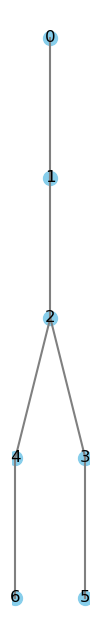

Burning number of this tree is 3


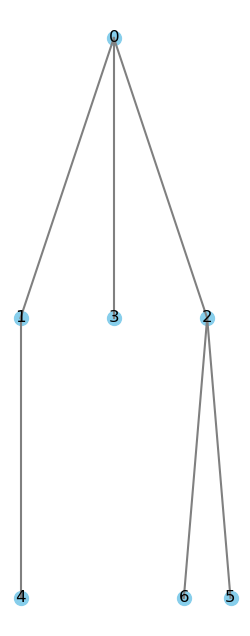

Burning number of this tree is 3


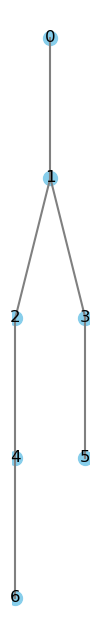

Burning number of this tree is 3


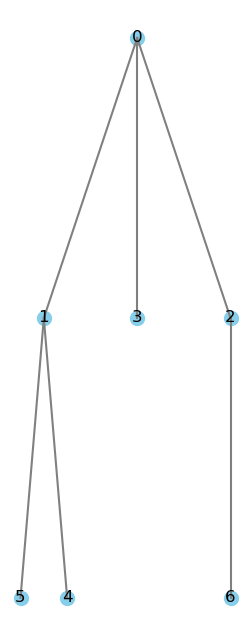

Burning number of this tree is 3


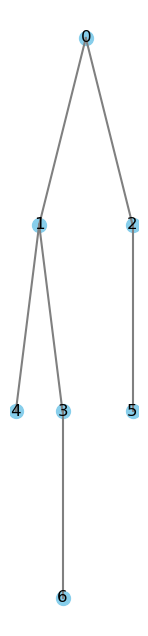

Burning number of this tree is 3


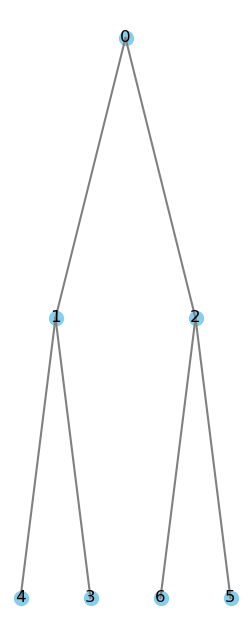

Burning number of this tree is 3


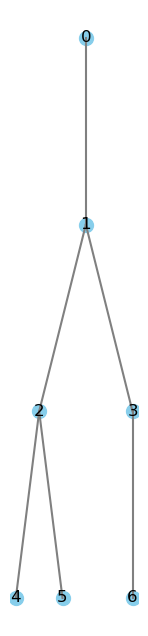

Burning number of this tree is 3


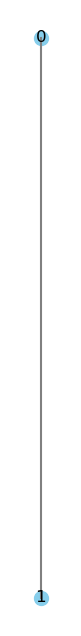

Burning number of this tree is 2


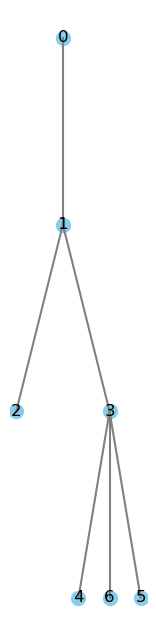

Burning number of this tree is 3


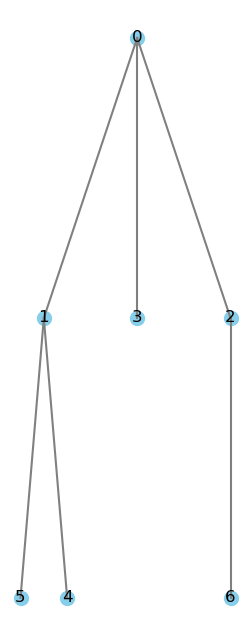

Burning number of this tree is 3


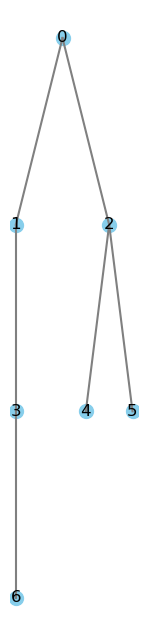

Burning number of this tree is 3


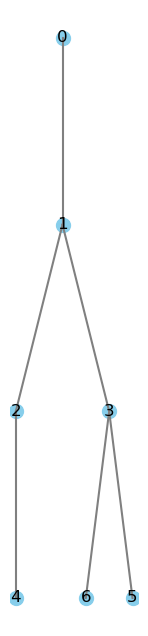

Burning number of this tree is 3


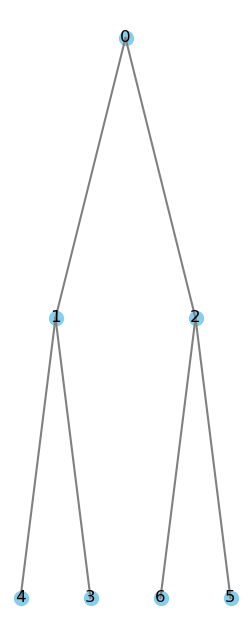

Burning number of this tree is 3


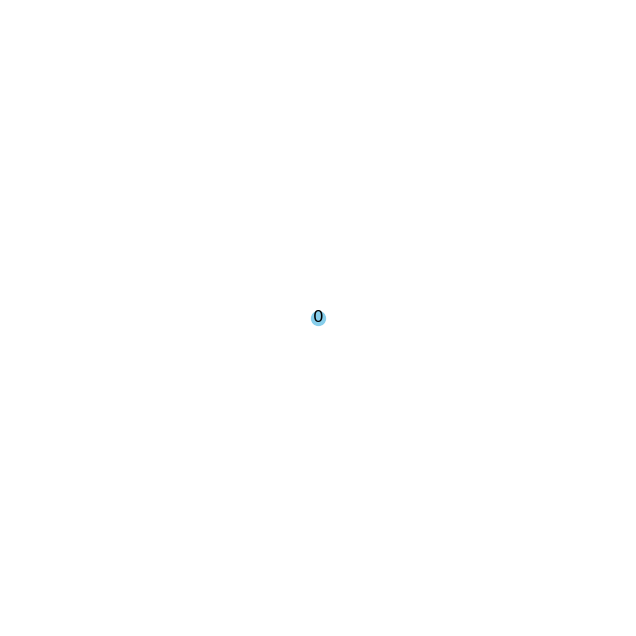

Burning number of this tree is 0


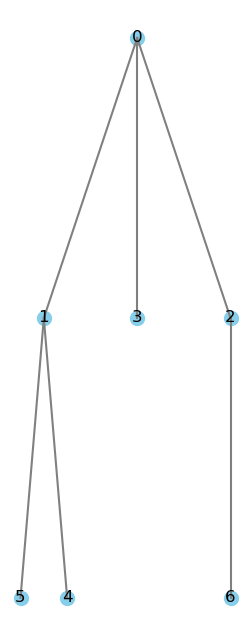

Burning number of this tree is 3


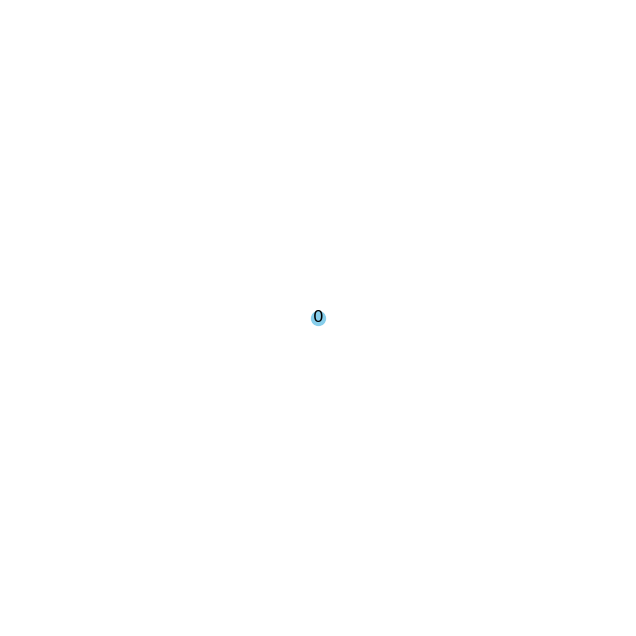

Burning number of this tree is 0


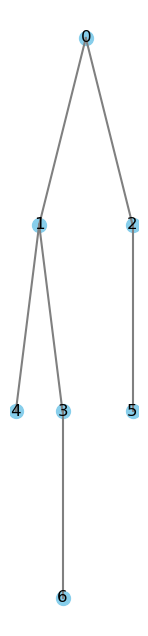

Burning number of this tree is 3


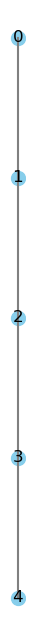

Burning number of this tree is 3


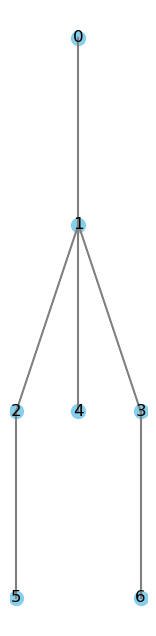

Burning number of this tree is 3


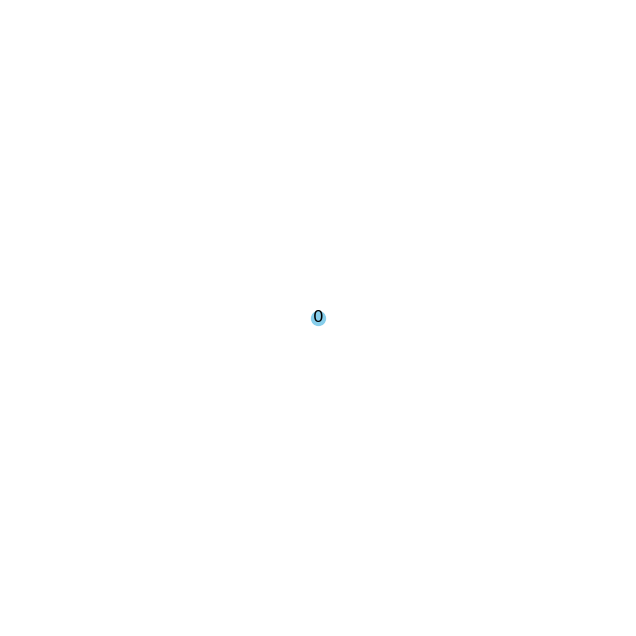

Burning number of this tree is 0


In [30]:
import math

zeta = [0, 1]
n = 7
for _ in range(20):
    zeta = [0.1, 0.3, 0.5, 0.1]
    nodes, edges = generate_GW(zeta, int(n))
    n = nodes
    nodes = list(range(nodes))
    tree = create_tree(nodes, edges)
    plot_tree(edges)

    print(f'Burning number of this tree is {burning_number(tree)}')